In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# from ipywidgets import interactive, IntSlider, Dropdown

from Pydle.util.ticks import Ticks
from Pydle.util.structures.CombatEngine import CombatEngine
from Pydle.util.structures.Monster import Monster
from Pydle.util.structures.Stats import Stats
from Pydle.util.structures.Player import Player
# from Pydle.lib.monsters import monsters
# from Pydle.lib.equipment.helms import HELMS
# from Pydle.util.structures.Equippable import Equippable

In [7]:
# def get_XP_rate(probability, XP, ticks_per_ore):
#     n_ticks = 3600. / Ticks()
#     n_attempts = int(n_ticks / ticks_per_ore)
#     n_success = int(n_attempts * probability)
#     total_xp = n_success * XP
#     return total_xp

level for 95% accuracy: 1


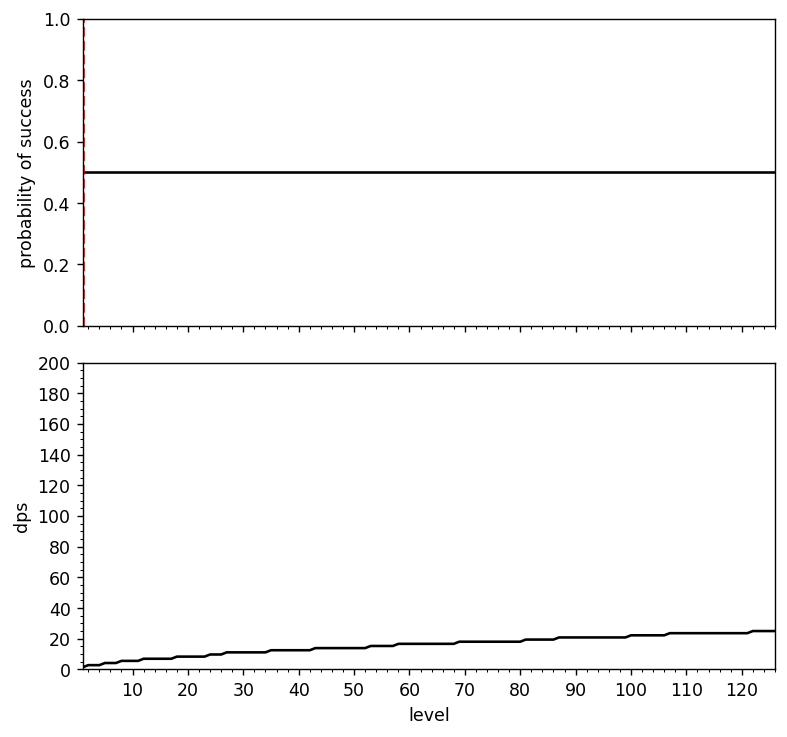

In [12]:
player = Player(name='TestPlayer')


def update_plot():
    # Setup
    # player.set_level('attack', attack_level)

    # HELMS['copper helm'] = Equippable(
    #     name='test helm',
    #     tier=1,
    #     stats=Stats({
    #         'attack_speed': 3,
    #         'accuracy': 0,
    #         'physical_strength': 200,
    #     })
    # )
    player.give('copper helm')
    player.equip('copper helm')

    player.give('copper longsword')
    player.equip('copper longsword')

    # monster_args = monsters[monster_key]
    monster = Monster(**{
        'name': 'test monster',
        'level': 1,
        # 'tier': MonsterTier.BASIC,
        # 'XP': 10.,
        # 'loot_table': (
        #     LootTable()
        #     .every('bones')
        #     .tertiary('coins', 0.5, 1)
        # ),
        'hitpoints': 100,
        'stats': Stats({
            'attack_speed': 4,
            'evasiveness': 0,
            'physical_defense': 1,
        }),
    })

    combat_engine = CombatEngine(player, monster)

    levels = np.arange(1, 127)

    # Accuracy
    accuracy = [combat_engine._calculate_effective_level(
        x, player.get_stat('accuracy')
    ) for x in levels]
    accuracy = np.array(accuracy)

    evasiveness = monster.get_stat('evasiveness')

    hit_chance = [combat_engine._calculate_hit_chance(
        x, evasiveness
    ) for x in accuracy]
    hit_chance = np.array(hit_chance)

    i_95 = np.abs(hit_chance - 0.95).argmin()
    print(f'level for 95% accuracy: {i_95 + 1}')

    # Damage
    physical_strength = [combat_engine._calculate_effective_level(
        x, player.get_stat('physical_strength')
    ) for x in levels]
    physical_strength = np.array(physical_strength)

    physical_defense = monster.get_stat('physical_defense')

    max_hit = [combat_engine._calculate_max_hit(
        x, physical_defense
    ) for x in physical_strength]
    max_hit = np.array(max_hit)

    dps = 0.5 * max_hit / Ticks(player.equipment['weapon'].attack_speed)

    # Plot
    fig, ax = plt.subplots(2, 1, dpi=125, figsize=(6.4, 6.), sharex=True)

    ax[0].xaxis.set_major_locator(MultipleLocator(10))
    ax[0].xaxis.set_minor_locator(MultipleLocator(2))

    ax[1].yaxis.set_major_locator(MultipleLocator(20))
    ax[1].yaxis.set_minor_locator(MultipleLocator(5))

    ax[1].set_xlabel('level')
    ax[0].set_ylabel('probability of success')
    ax[1].set_ylabel('dps')

    ax[0].set_xlim(1, 126)
    ax[0].set_ylim(0., 1.)
    ax[1].set_ylim(bottom=0., top=200.)

    ax[0].plot(levels, hit_chance, 'k-')
    ax[0].axvline(i_95 + 1, ls='--', color='red')

    ax[1].plot(levels, dps, 'k-')
    
    plt.tight_layout()
    plt.show()

# interactive_plot = interactive(
#     update_plot,
#     attack_level=slider_attack_level,
# )
# display(interactive_plot)

update_plot()